In [1]:
import pickle
from matplotlib import pyplot as plt
from sklearn.cluster import AffinityPropagation
from pandas import DataFrame
import numpy as np
import utils

In [2]:
# Read globo dataset
df_globo = utils.read_globo_csv("../data/globo/clicks/*.csv")
df_globo.reset_index(inplace=True, drop=True)
df_globo.head(5)

[ INFO ] reading dataset
[ INFO ] finish reading dataset


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [3]:
# Rename columns removing redundant 'click_' prefix
df_globo.rename(columns={column: column.split("click_")[-1] for column in df_globo.columns}, inplace=True)
df_globo.head(5)

,user_id,session_id,session_start,session_size,article_id,timestamp,environment,deviceGroup,os,country,region,referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [4]:
# Get sorted unique article ids
np_article_ids = np.array(df_globo['article_id'])
np_article_ids.sort()
np_article_ids = np.unique(np_article_ids)
np_article_ids[:5]

array([3, 27, 69, 81, 84], dtype=object)

In [38]:
# Read TSNE features
features = pickle.load(open("../data/tsne_features.p", "rb"))
np_clicks = np.ndarray((np_article_ids.shape[0], 2), dtype=float)
for i, item in enumerate(np_article_ids):
    np_clicks[i] = features[item]
np_clicks[:5]

array([[ 34.92921066,   0.09579808],
       [ 10.9506588 , -26.21141815],
       [ 34.3598175 ,  -0.17689024],
       [ 34.41482162,  -0.69089043],
       [ 35.33599472,  -1.57823849]])

In [6]:
# Get Afinitty Propagation cluster centers
sample=2000
tsne_clicks_sample = utils.get_sample(np_clicks, sample)
clustering = AffinityPropagation(damping=0.9).fit(tsne_clicks_sample)
print("labels: ", clustering.labels_.size)
print("n_clusters: ", len(clustering.cluster_centers_indices_))
cluster_centers = tsne_clicks_sample[clustering.cluster_centers_indices_[:]]
cluster_centers[:5]

labels:  2000
n_clusters:  45


array([[ 11.06942749, -23.29642677],
       [  5.96885681,  15.46016407],
       [ -9.93880463,  27.90839386],
       [  2.26163411, -22.31072044],
       [ -8.56633949, -18.82313728]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


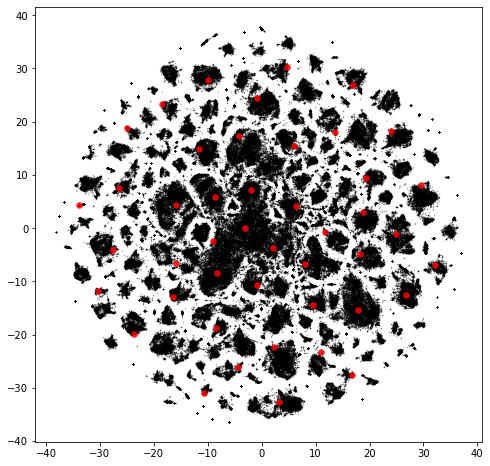

In [37]:
# Plot cluster centers
plt.rcParams['figure.figsize'] = [8, 8]
utils.plot_tsne_points(features, cluster_centers)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


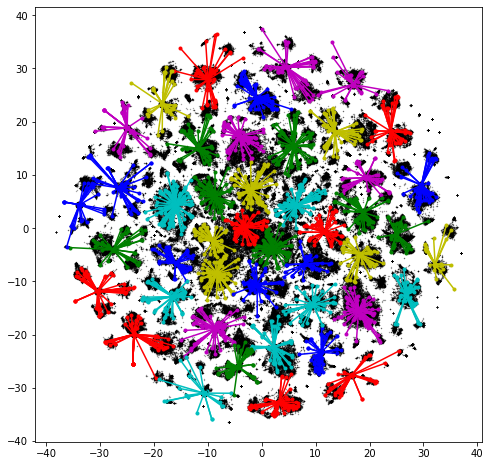

In [28]:
# Plot clusters' affinity propagation rays
plt.rcParams['figure.figsize'] = [8, 8]
utils.plot_tsne_points(features, cluster_centers)
utils.plot_affinity_propagation(clustering, tsne_clicks_sample)

In [10]:
# Generate fictional unique topic labels for each cluster centroid
df_center = DataFrame(cluster_centers, columns=['x', 'y'])
df_center['label'] = utils.get_random_labels(df_center.shape[0])
while df_center['label'].unique().shape[0] < df_center.shape[0]:
    df_center['label'] = utils.get_random_labels(df_center.shape[0])
df_center.head(5)

,x,y,label
0,11.069427,-23.296427,pink-topics
1,5.968857,15.460164,tangerine-themes
2,-9.938805,27.908394,lapis-rumors
3,2.261634,-22.310720,indigo-phenomenons
4,-8.566339,-18.823137,violet-rumors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


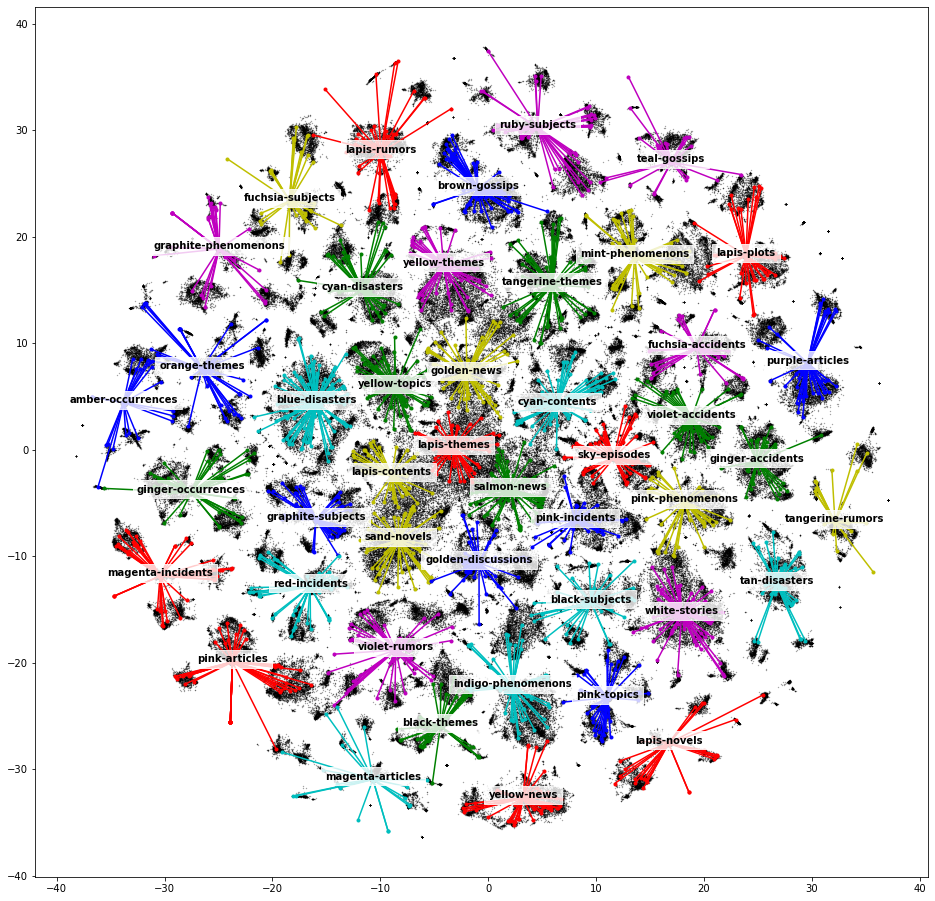

In [30]:
# Plot cluster centers with labels
plt.rcParams['figure.figsize'] = [16, 16]
utils.plot_tsne_points(features, cluster_centers)
utils.plot_affinity_propagation(clustering, tsne_clicks_sample)
for row in df_center.iterrows():
    plt.text(x=row[1]['x'], y=row[1]['y'], s=row[1]['label'], backgroundcolor=(1, 1, 1, 0.8), fontsize=10, horizontalalignment='center', fontweight='semibold')

In [31]:
# Match article datapoints with its respective centroid label
df_labeled_articles = DataFrame(np_article_ids, columns=['article_id'])
df_labeled_articles[['x', 'y']] = DataFrame(np_clicks)
df_labeled_articles['label'] = ''
df_labeled_articles['label'] = df_labeled_articles.apply(lambda row: utils.get_nearest_label(row, df_center), axis=1)
df_labeled_articles.head(5)

,article_id,x,y,label
0,3,34.929211,0.095798,tangerine-rumors
1,27,10.950659,-26.211418,pink-topics
2,69,34.359818,-0.176890,tangerine-rumors
3,81,34.414822,-0.690890,tangerine-rumors
4,84,35.335995,-1.578238,tangerine-rumors


In [32]:
# Get corresponding centroid coordinates
df_labeled_articles['x_centroid'] = df_labeled_articles['label'].map(df_center.set_index('label')['x'])
df_labeled_articles['y_centroid'] = df_labeled_articles['label'].map(df_center.set_index('label')['y'])
df_labeled_articles.head(5)

,article_id,x,y,label,x_centroid,y_centroid
0,3,34.929211,0.095798,tangerine-rumors,32.163002,-6.822354
1,27,10.950659,-26.211418,pink-topics,11.069427,-23.296427
2,69,34.359818,-0.176890,tangerine-rumors,32.163002,-6.822354
3,81,34.414822,-0.690890,tangerine-rumors,32.163002,-6.822354
4,84,35.335995,-1.578238,tangerine-rumors,32.163002,-6.822354


In [33]:
# Reduces size of dataframe with sampled users ids
user_id_samples = pickle.load(open("../data/np_uids_100.p", "rb"))
df_reduced = df_globo[df_globo['user_id'].isin(user_id_samples)]

df_reduced = df_reduced.assign(x_centroid=df_reduced.article_id.map(df_labeled_articles.set_index('article_id')['x_centroid']))
df_reduced = df_reduced.assign(y_centroid=df_reduced.article_id.map(df_labeled_articles.set_index('article_id')['y_centroid']))
df_reduced.sort_values(by='timestamp', inplace=True)
df_reduced.reset_index(inplace=True, drop=True)
df_reduced

,user_id,session_id,session_start,session_size,article_id,timestamp,environment,deviceGroup,os,country,region,referrer_type,x_centroid,y_centroid
0,183,1506826927304920,1506826927000,10,159359,1506826949562,4,1,17,1,13,1,-8.947676,-2.406779
1,183,1506826927304920,1506826927000,10,96663,1506826965600,4,1,17,1,13,1,-0.968300,24.485126
2,64,1506826382352801,1506826382000,16,119592,1506826989603,4,1,17,1,25,1,23.916203,18.216473
3,24,1506825812326761,1506825812000,4,162286,1506827029118,4,1,17,1,25,1,-8.298566,-8.495909
4,64,1506826382352801,1506826382000,16,236294,1506827034225,4,1,17,1,25,1,-8.589165,5.890934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169718,12526,1507897794270380,1507897794000,57,118696,1508522770519,4,1,17,1,21,1,23.916203,18.216473
169719,21356,1507119319339945,1507119319000,16,284221,1508532572918,4,1,17,1,21,6,17.942770,-15.394094
169720,21356,1507119319339945,1507119319000,16,71518,1509110330715,4,1,17,1,25,1,-9.938805,27.908394
169721,21356,1507119319339945,1507119319000,16,70413,1509132836381,4,1,17,1,21,1,-15.965187,4.380775


In [34]:
# Generate simulated sessions
sample_sessions = utils.build_simulated_sessions(user_id_samples, df_reduced)
list(map(utils.euclidean_from_centroid, sample_sessions))
sample_sessions[0]

[ INFO ] building simulated sessions
0
1000


,user_id,session_id,session_start,session_size,article_id,timestamp,environment,deviceGroup,os,country,region,referrer_type,x_centroid,y_centroid,distance
0,47792,1506941814233466,1506941814000,4,272660,1506942573151,4,1,17,1,11,1,24.935484,-1.109507,0.000000
1,47792,1506941814233466,1506941814000,4,284463,1506942589274,4,1,17,1,11,1,17.942770,-15.394094,15.904322
2,47792,1506941814233466,1506941814000,4,313504,1506943132191,4,1,17,1,11,2,18.853237,2.967523,18.384176
3,47792,1506941814233466,1506941814000,4,140720,1506943162191,4,1,17,1,11,2,2.261634,-22.310720,30.236913
4,47792,1506962804105319,1506962804000,3,162655,1506966930490,4,1,17,1,11,2,-8.298566,-8.495909,17.388699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,55010,1508170786356161,1508170786000,30,118348,1508199021567,4,1,17,1,25,1,23.916203,18.216473,61.022194
265,55010,1508170786356161,1508170786000,30,119383,1508199086027,4,1,17,1,25,1,23.916203,18.216473,0.000000
266,55010,1508170786356161,1508170786000,30,118868,1508199218786,4,1,17,1,25,1,23.916203,18.216473,0.000000
267,55010,1508170786356161,1508170786000,30,119050,1508199402797,4,1,17,1,25,1,23.916203,18.216473,0.000000


In [35]:
# Find cutoff indexes
mean_session_cutoff = np.zeros(shape=len(sample_sessions))
for index, session in enumerate(sample_sessions):
    mean_session_cutoff[index] = session[session['user_id'] != session['user_id'].shift(1)]['distance'].iloc[-1]

cutoff_array = np.linspace(start=1, stop=60, num=15)
error_array = np.ones(shape=len(sample_sessions))

cut_sessions = utils.get_cut_sessions(sample_sessions, 40) # tuple (dataframe, index_of_cut)

In [36]:
# Calculate cuttof error
error_list = []
for index1, cutoff in enumerate(cutoff_array):
    for index2, session in enumerate(sample_sessions):
        session.reset_index(inplace=True, drop=True)
        rows = session[session['distance'] > cutoff]
        cutoff_index = -1
        if len(rows) > 0:
            cutoff_index = rows.index[0]
        true_index = session[session['user_id'] != session['user_id'].shift(1)].index[1]
        last_index = len(session) - 1
        error_array[index2] = utils.get_error(cutoff_index, true_index, last_index)
    error_list.append({"cutoff": cutoff, "mean": error_array.mean(), "std": error_array.std()})
    print({"cutoff": cutoff, "mean": error_array.mean(), "std": error_array.std()})

df_errors = DataFrame(error_list)
df_errors

{'cutoff': 1.0, 'mean': 0.9907528202272557, 'std': 0.006384684796423946}
{'cutoff': 5.214285714285714, 'mean': 0.9907528202272557, 'std': 0.006384684796423946}
{'cutoff': 9.428571428571429, 'mean': 0.9895053082153245, 'std': 0.008702457704091929}
{'cutoff': 13.642857142857142, 'mean': 0.9884038916182071, 'std': 0.010920586678776673}
{'cutoff': 17.857142857142858, 'mean': 0.9862056695848013, 'std': 0.013430099570697079}
{'cutoff': 22.071428571428573, 'mean': 0.9829402870156008, 'std': 0.02261098478241081}
{'cutoff': 26.285714285714285, 'mean': 0.9788514889163908, 'std': 0.02565354582587242}
{'cutoff': 30.5, 'mean': 0.9702039811583527, 'std': 0.03569578330582964}
{'cutoff': 34.714285714285715, 'mean': 0.9513046583767365, 'std': 0.05497712418467577}
{'cutoff': 38.92857142857143, 'mean': 0.9381756309346467, 'std': 0.0738306474613491}
{'cutoff': 43.142857142857146, 'mean': 0.8887996434197081, 'std': 0.13796655815928643}
{'cutoff': 47.35714285714286, 'mean': 0.842332638089753, 'std': 0.17526

,cutoff,mean,std
0,1.000000,0.990753,0.006385
1,5.214286,0.990753,0.006385
2,9.428571,0.989505,0.008702
3,13.642857,0.988404,0.010921
4,17.857143,0.986206,0.013430
5,22.071429,0.982940,0.022611
6,26.285714,0.978851,0.025654
7,30.500000,0.970204,0.035696
8,34.714286,0.951305,0.054977
9,38.928571,0.938176,0.073831
